In [1]:
import pandas as pd
import numpy as np

In [2]:
medical_dt=pd.read_csv('insurance.csv')

In [3]:
medical_dt

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [4]:
medical_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_dt.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
!pip install plotly matplotlib seaborn --quiet

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='bmi', ylabel='charges'>

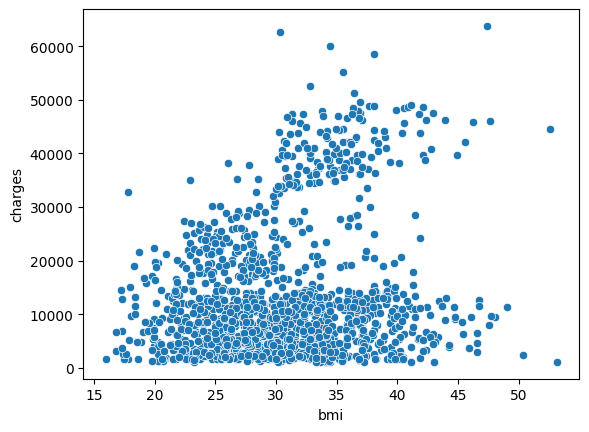

In [8]:
sns.scatterplot(data=medical_dt,x="bmi",y="charges")

<Axes: xlabel='bmi', ylabel='charges'>

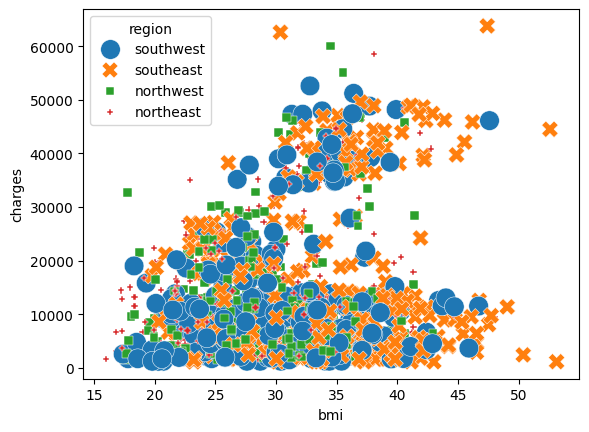

In [9]:
sns.scatterplot(data=medical_dt,x="bmi",y="charges",hue="region",style="region", size="region",
    sizes=(20, 200), legend="full")

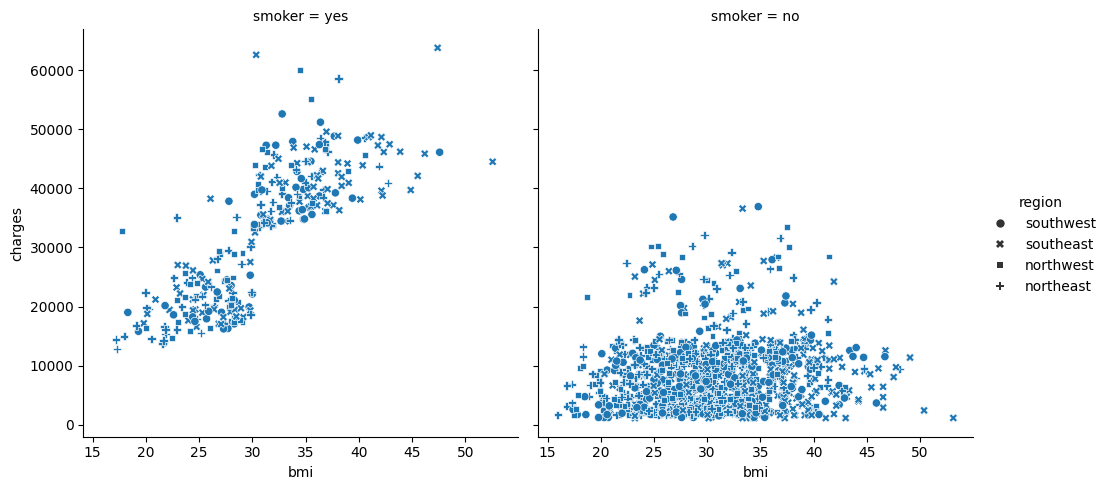

In [10]:
sns.relplot(data=medical_dt,x="bmi",y="charges",col="smoker",style="region",
    kind="scatter",)

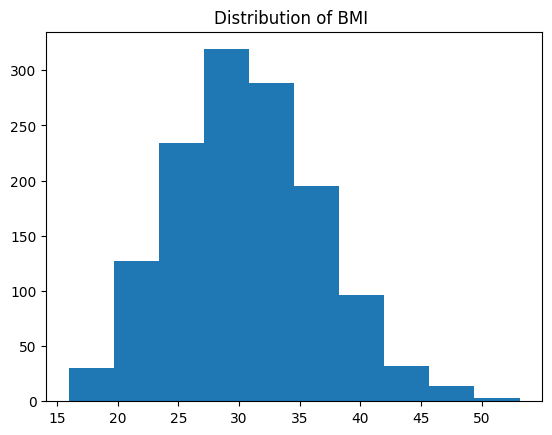

In [11]:
plt.title("Distribution of BMI ")
plt.hist(medical_dt.bmi);

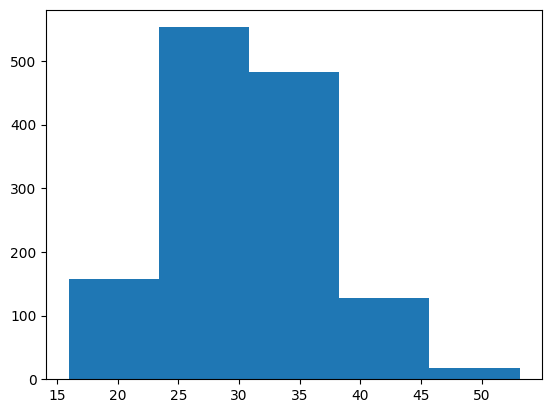

In [12]:
plt.hist(medical_dt.bmi, bins=5);

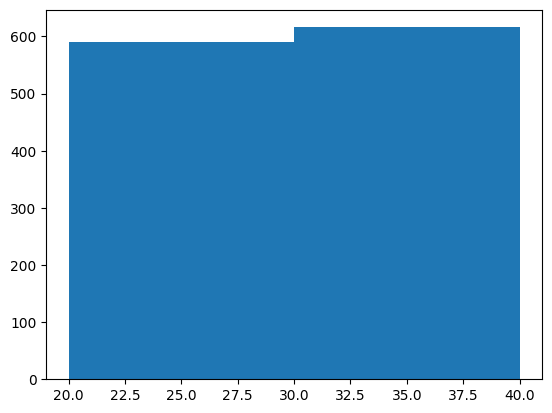

In [13]:
plt.hist(medical_dt.bmi, bins=np.arange(20, 50, 10));

In [14]:
medical_dt.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

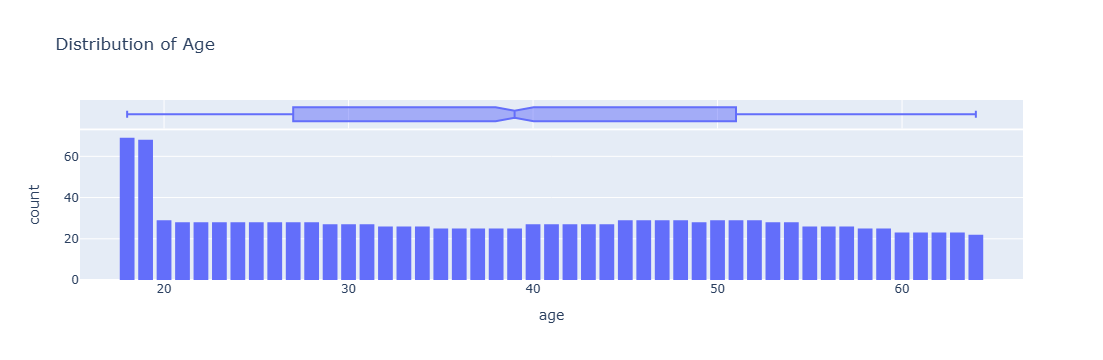

In [15]:
fig = px.histogram(medical_dt, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.2)
fig.show()

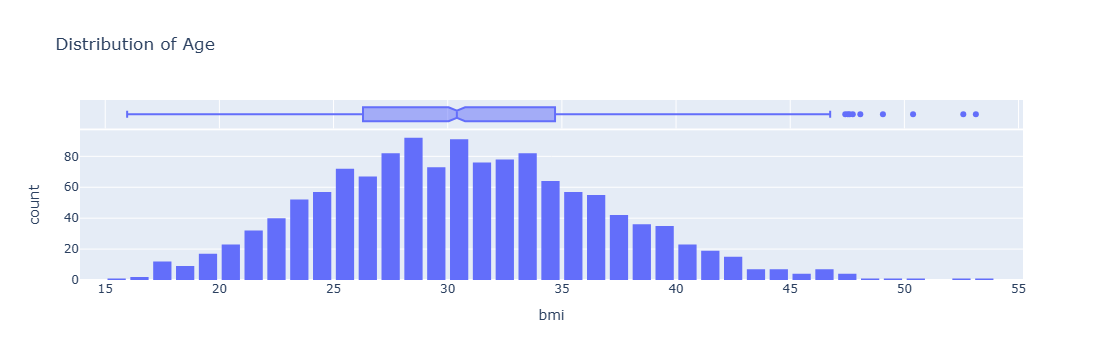

In [16]:
fig = px.histogram(medical_dt, 
                   x='bmi', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.2)
fig.show()

Visualize the distribution of medical charges in connection with other factors like "sex" and "region"

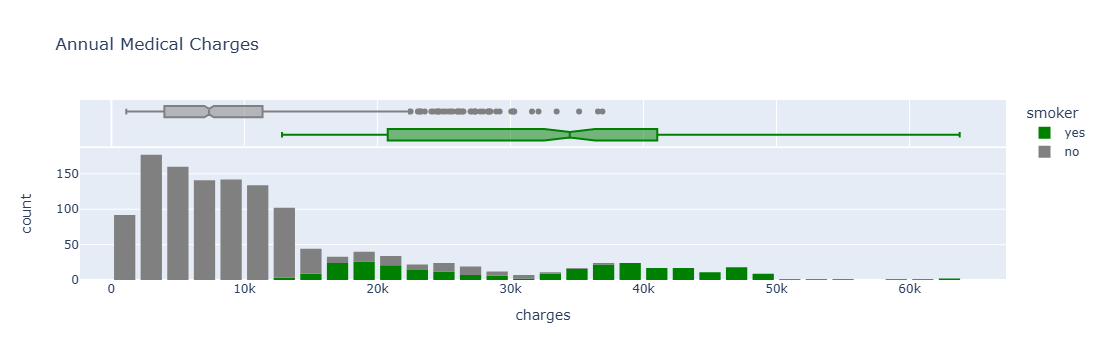

In [17]:
fig = px.histogram(medical_dt, 
                   x='charges', 
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.2)
fig.show()

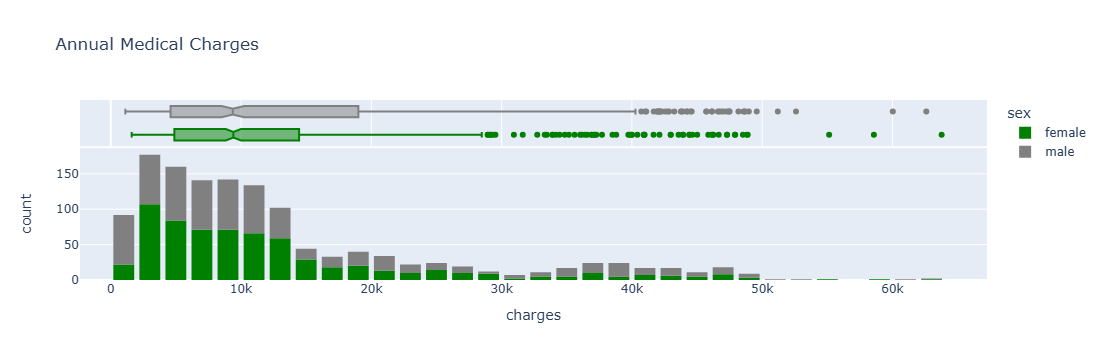

In [18]:
fig = px.histogram(medical_dt, 
                   x='charges', 
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.2)
fig.show()

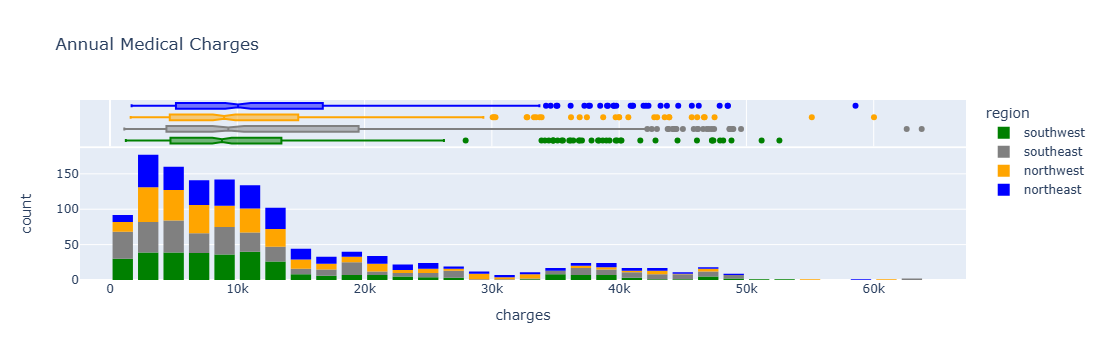

In [19]:
fig = px.histogram(medical_dt, 
                   x='charges', 
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey','orange','blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.2)
fig.show()

Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [20]:
medical_dt.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

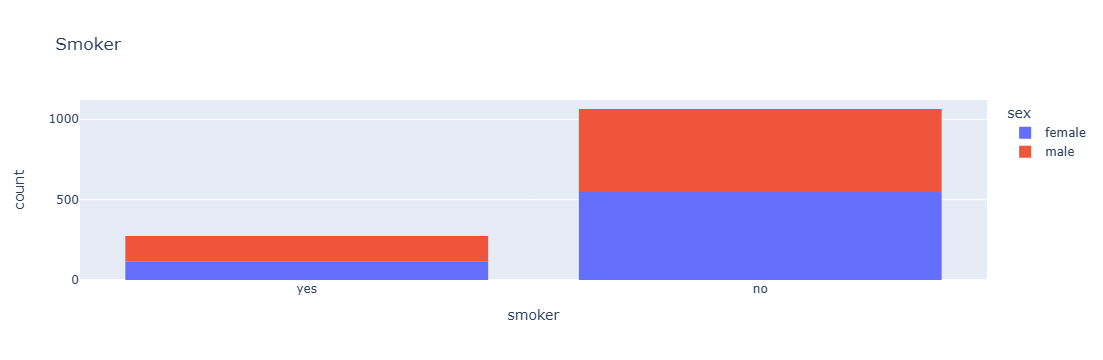

In [21]:
px.histogram(medical_dt, x='smoker', color='sex', title='Smoker')

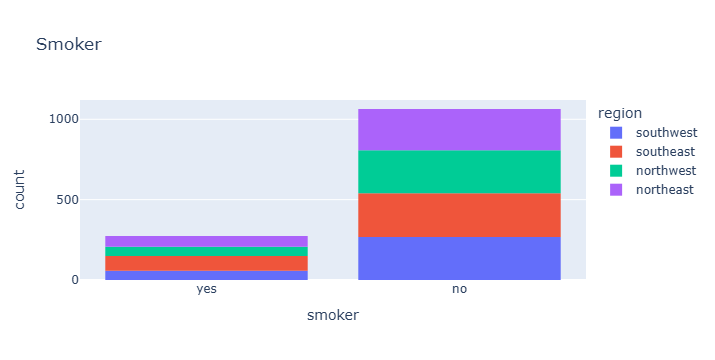

In [22]:
px.histogram(medical_dt, x='smoker', color='region', title='Smoker')

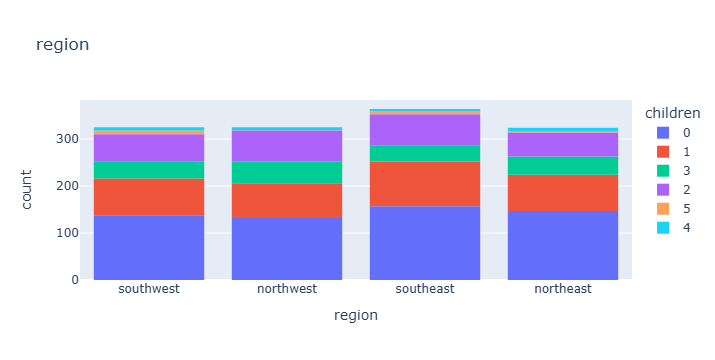

In [23]:
px.histogram(medical_dt, x='region', color='children', title='region')

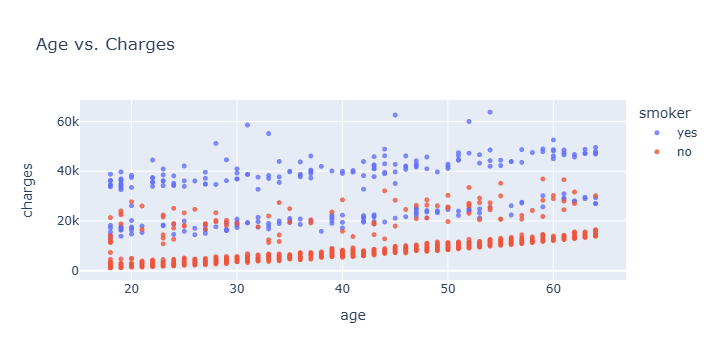

In [25]:
fig=px.scatter(medical_dt,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
                hover_data=['sex','region'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()
               

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened chart?
>
> ???

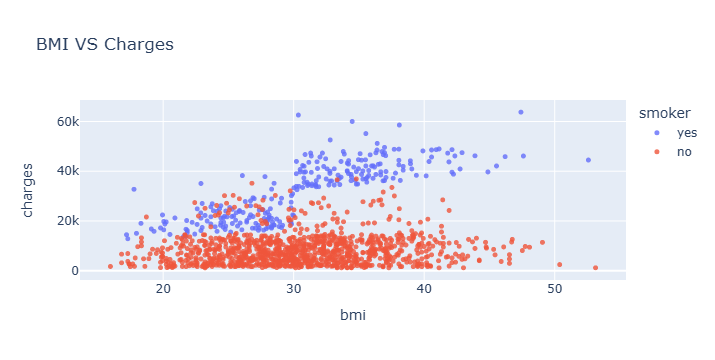

In [29]:
fig=px.scatter(medical_dt,x='bmi',y='charges',color='smoker',opacity=0.8,
               hover_data=['sex','region'], title='BMI VS Charges')
fig.update_traces(marker_size=5)
fig.show()

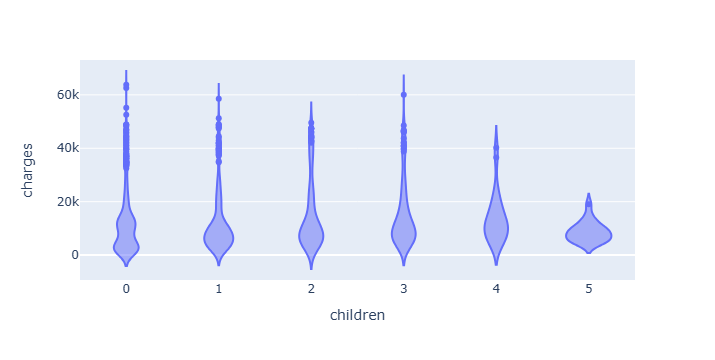

In [31]:
px.violin(medical_dt,x='children',y='charges')

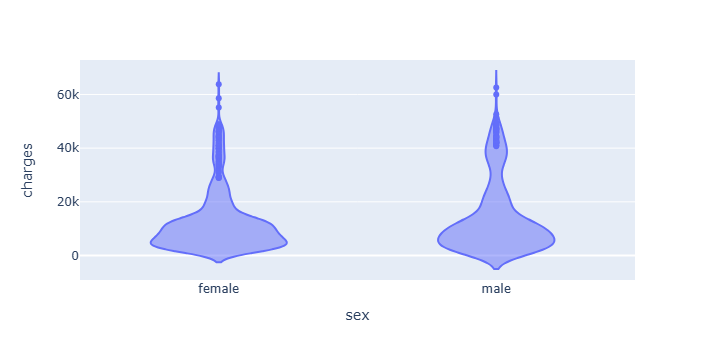

In [32]:
px.violin(medical_dt,x='sex',y='charges')

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [33]:
medical_dt.charges.corr(medical_dt.age)

0.29900819333064765

In [35]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_dt.smoker.map(smoker_values)
medical_dt.charges.corr(smoker_numeric)

0.7872514304984772

In [37]:
hp.commit()

NameError: name 'hp' is not defined